In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)
data.head()


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.rename(columns={'Passengers': 'Sales'}, inplace=True)

data.head()


,Sales
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


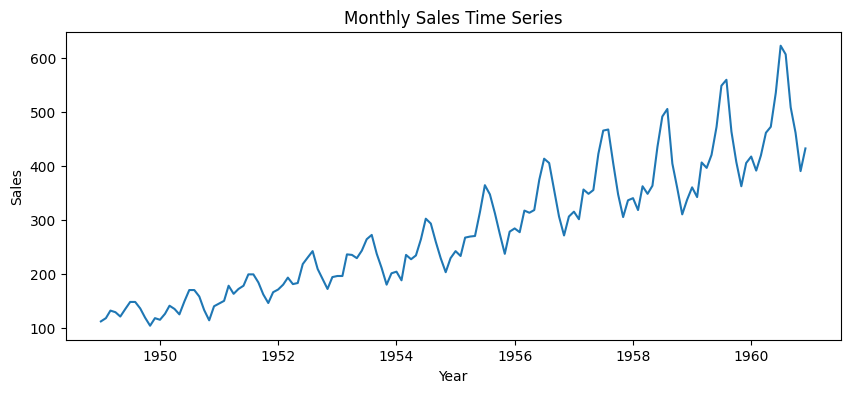

In [8]:
plt.figure(figsize=(10,4))
plt.plot(data['Sales'])
plt.title("Monthly Sales Time Series")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()


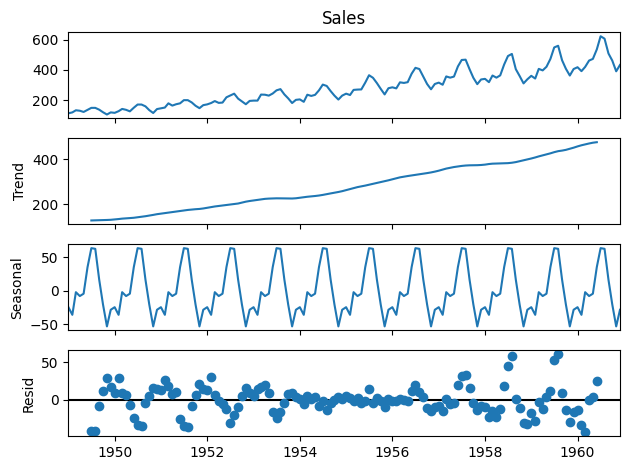

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Sales'], model='additive')
decomposition.plot()
plt.show()


In [10]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data['Sales'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


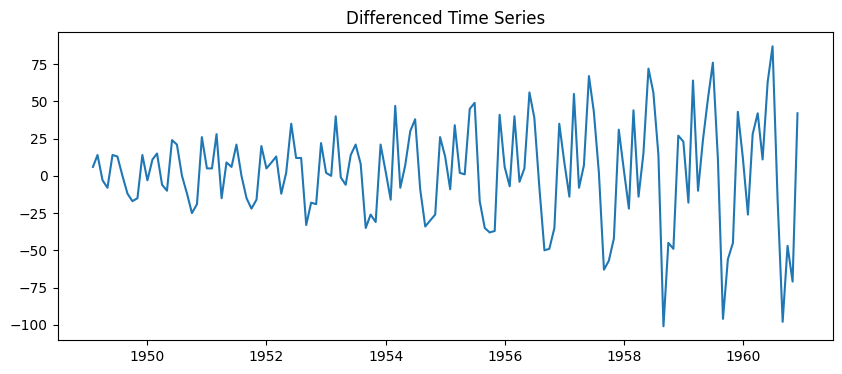

In [11]:
data_diff = data['Sales'].diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(data_diff)
plt.title("Differenced Time Series")
plt.show()


In [12]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Sales'], order=(1,1,1))
model_fit = model.fit()

model_fit.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Fri, 30 Jan 2026   AIC                           1394.683
Time:                        16:28:05   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.000     751.362    1172.492
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.65   Prob(JB):                         0.34
Heteroskedasticity (H):               7.00   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
forecast = model_fit.forecast(steps=12)
forecast


,predicted_mean
1961-01-01,475.735059
1961-02-01,454.996073
1961-03-01,464.830415
1961-04-01,460.167010
1961-05-01,462.378378
1961-06-01,461.329756
1961-07-01,461.827008
1961-08-01,461.591213
1961-09-01,461.703026
1961-10-01,461.650005


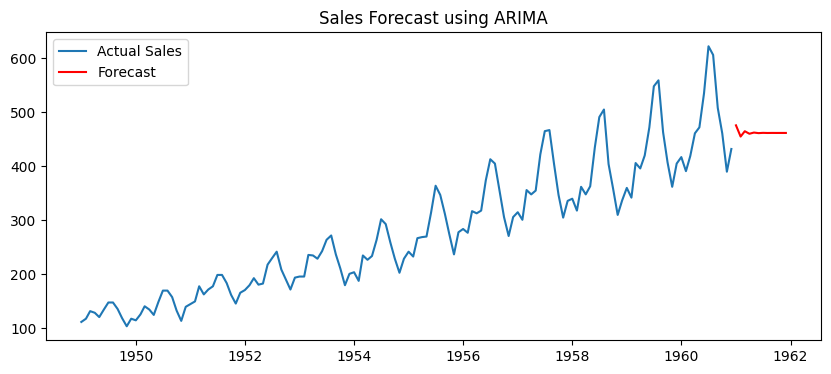

In [14]:
plt.figure(figsize=(10,4))
plt.plot(data['Sales'], label='Actual Sales')

future_dates = pd.date_range(
    start=data.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq='MS'
)

plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.title("Sales Forecast using ARIMA")
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train = data['Sales'][:-12]
test = data['Sales'][-12:]

pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

rmse = np.sqrt(mean_squared_error(test, pred))
mae = mean_absolute_error(test, pred)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 49.576329724095636
MAE: 40.54663139889178
